In [171]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import seaborn as sns
import os
from glob import iglob

In [172]:
# Load results from the bivariate analysis
mod2unp = pd.read_csv("modbase2unpac.txt",delimiter='\t')
mod2unp['modelid'] = mod2unp['modelid'].apply(lambda x: x.split('_')[0])
mod2unp = mod2unp[mod2unp["unp"]!="None"].drop_duplicates(["modelid","unp"])
D   = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-08-04/modbase_cosmic-exac/modbase_cosmic-exac_D_summary.txt",delimiter='\t')
D   = D.drop_duplicates(["sid","chain"])
D   = D.merge(mod2unp,how='left',left_on="sid",right_on="modelid")
KAB = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-08-04/modbase_cosmic-exac/modbase_cosmic-exac_KAB_summary.txt",delimiter='\t')
KAB = KAB.drop_duplicates(["sid","chain"])
KAB = KAB.merge(mod2unp,how='left',left_on="sid",right_on="modelid")
KAD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-08-04/modbase_cosmic-exac/modbase_cosmic-exac_KAD_summary.txt",delimiter='\t')
KAD = KAD.drop_duplicates(["sid","chain"])
KAD = KAD.merge(mod2unp,how='left',left_on="sid",right_on="modelid")
KBD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-08-04/modbase_cosmic-exac/modbase_cosmic-exac_KBD_summary.txt",delimiter='\t')
KBD = KBD.drop_duplicates(["sid","chain"])
KBD = KBD.merge(mod2unp,how='left',left_on="sid",right_on="modelid")

In [184]:
print "Number of structures evaluated:",
print len(D)

print "\nD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(D[D["p"]<0.01]),len(D[D["p"]<0.01]) / float(len(D)))

print "\nK* Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KAB[KAB["p"]<0.01]),len(KAB[KAB["p"]<0.01]) / float(len(KAB)))

print "\nKAD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KAD[KAD["p"]<0.01]),len(KAD[KAD["p"]<0.01]) / float(len(KAD)))

print "\nKBD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KBD[KBD["p"]<0.01]),len(KBD[KBD["p"]<0.01]) / float(len(KBD)))

Number of structures evaluated: 13324

D Proportion with nominally significant unweighted p-values:
Permutation:  ( 281) 0.0211

K* Proportion with nominally significant unweighted p-values:
Permutation:  ( 494) 0.0371

KAD Proportion with nominally significant unweighted p-values:
Permutation:  ( 469) 0.0352

KBD Proportion with nominally significant unweighted p-values:
Permutation:  ( 434) 0.0326


In [174]:
from qvalue import estimate
THRESH = 0.1

D   = D.sort_values(by='p').drop_duplicates('unp')
KAB = KAB.sort_values(by='p').drop_duplicates('unp')
KAD = KAD.sort_values(by='p').drop_duplicates('unp')
KBD = KBD.sort_values(by='p').drop_duplicates('unp')

D['q'],    D_lam,  D_pi = estimate(  D['p'].values)
KAB['q'],KAB_lam,KAB_pi = estimate(KAB['p'].values)
KAD['q'],KAD_lam,KAD_pi = estimate(KAD['p'].values)
KBD['q'],KBD_lam,KBD_pi = estimate(KBD['p'].values)

print "Proteins passing an FDR of %.0f%% for K_cosmic - K_exac"%(THRESH*100)
print "Permutation: %4d"%(D["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K*"%(THRESH*100)
print "Permutation: %4d"%(KAB["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_cosmic - K*"%(THRESH*100)
print "Permutation: %4d"%(KAD["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_exac - K*"%(THRESH*100)
print "Permutation: %4d"%(KBD["q"]<THRESH).sum()

Proteins passing an FDR of 10% for K_cosmic - K_exac
Permutation:    0

Proteins passing an FDR of 10% for K*
Permutation: 2164

Proteins passing an FDR of 10% for K_cosmic - K*
Permutation: 3217

Proteins passing an FDR of 10% for K_exac - K*
Permutation: 1223


In [175]:
D.to_csv("/Volumes/sivleyrm/pdbmap/results/ripleysK_results/pdb_cosmic_exac_multivariate_D.txt",
            header=False,index=False,sep="\t",na_rep="\N")
KAD.to_csv("/Volumes/sivleyrm/pdbmap/results/ripleysK_results/pdb_cosmic_exac_multivariate_KAD.txt",
            header=False,index=False,sep="\t",na_rep="\N")
KBD.to_csv("/Volumes/sivleyrm/pdbmap/results/ripleysK_results/pdb_cosmic_exac_multivariate_KBD.txt",
            header=False,index=False,sep="\t",na_rep="\N")

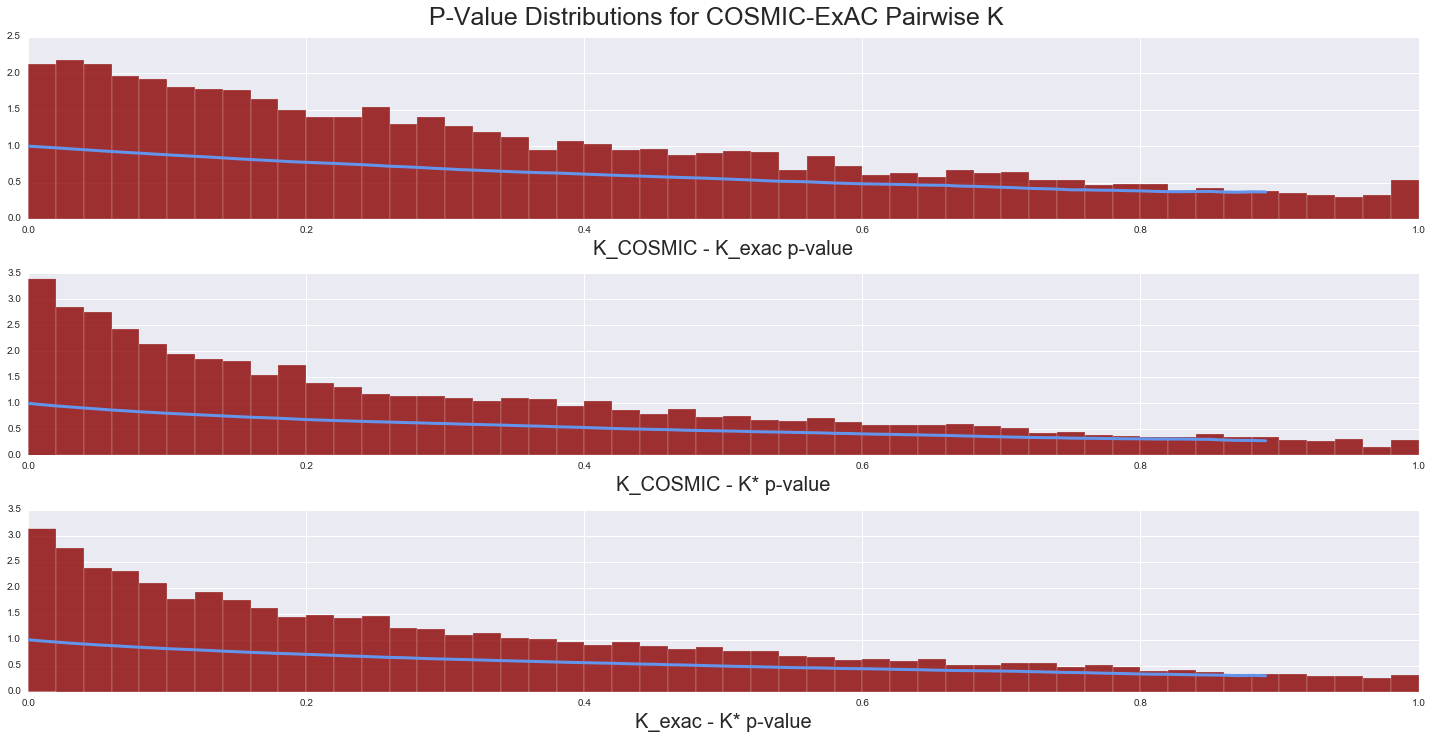

In [176]:
# P-Value Distributions
fig,ax = plt.subplots(3,1,figsize=(20,10))
plt.suptitle("P-Value Distributions for COSMIC-ExAC Pairwise K",fontsize=25,y=1.02)

ax[0].set_xlabel("K_COSMIC - K_exac p-value",fontsize=20)
# ax[0].hist(D["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[0].hist(D["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[0].plot(D_lam,D_pi,lw=3,c='cornflowerblue')

ax[1].set_xlabel("K_COSMIC - K* p-value",fontsize=20)
# ax[1].hist(KAD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[1].hist(KAD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[1].plot(KAD_lam,KAD_pi,lw=3,c='cornflowerblue')

ax[2].set_xlabel("K_exac - K* p-value",fontsize=20)
# ax[2].hist(KBD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[2].hist(KBD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[2].plot(KBD_lam,KBD_pi,lw=3,c='cornflowerblue')

plt.tight_layout()
plt.show()

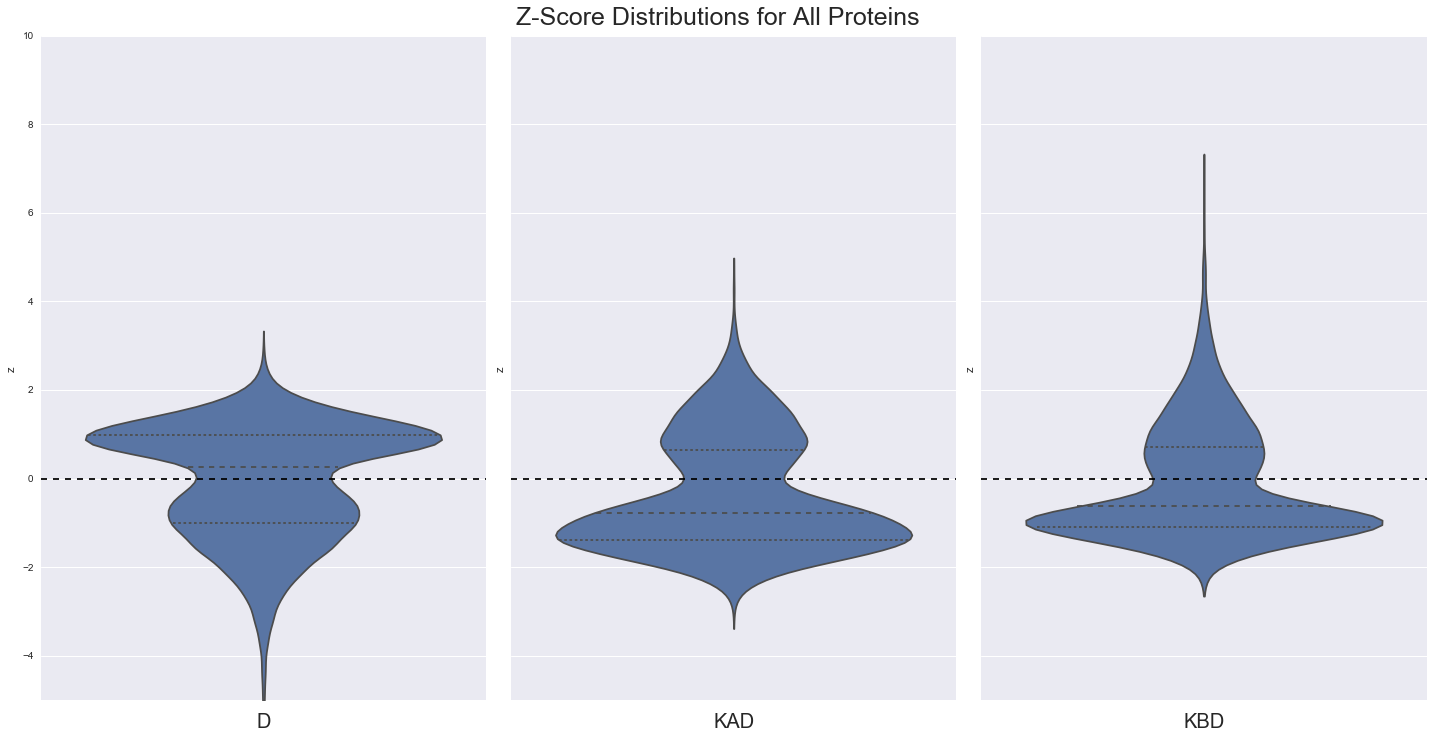

In [177]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D['z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.violinplot(KAD['z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.violinplot(KBD['z'],ax=ax[2],cut=0,orient='v',inner='quart')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,10])
plt.suptitle("Z-Score Distributions for All Proteins",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

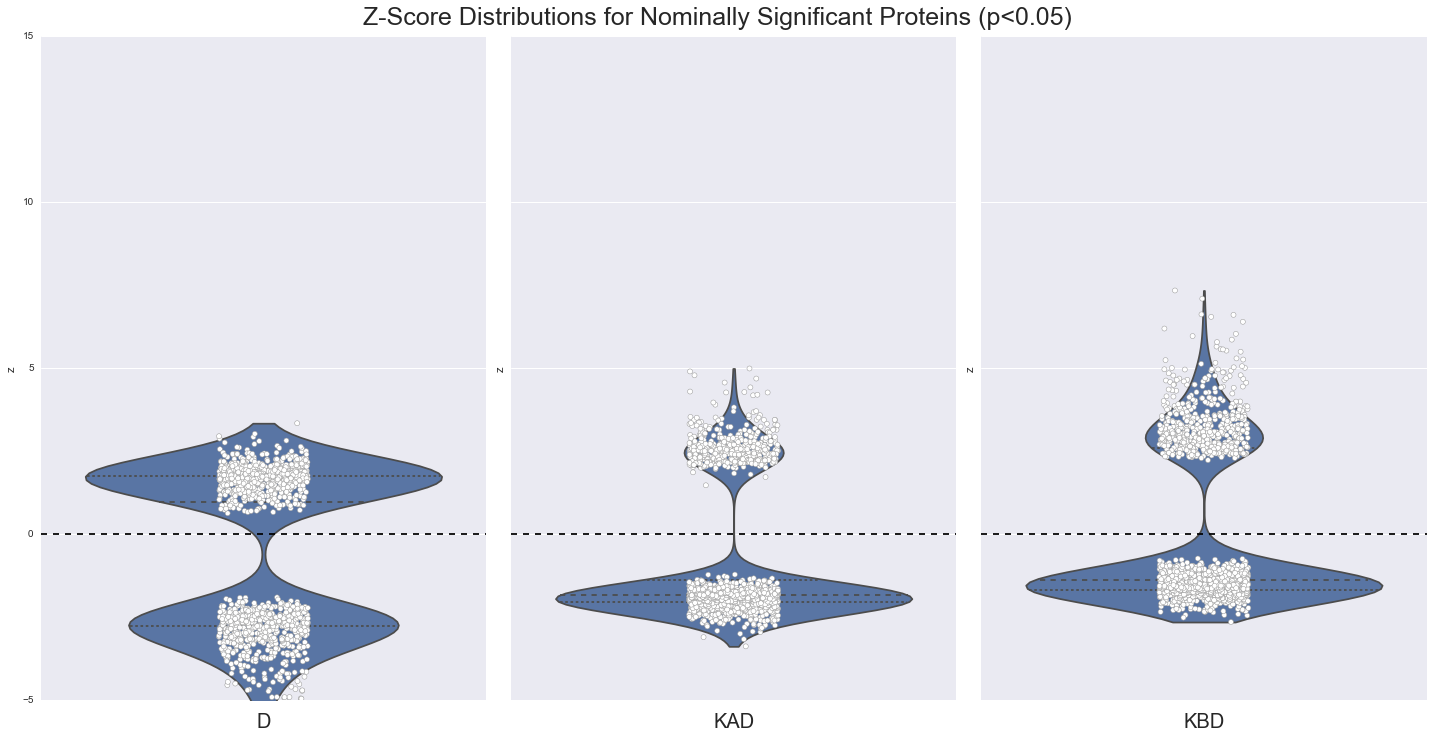

In [178]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['p']<0.05,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['p']<0.05,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for Nominally Significant Proteins (p<0.05)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

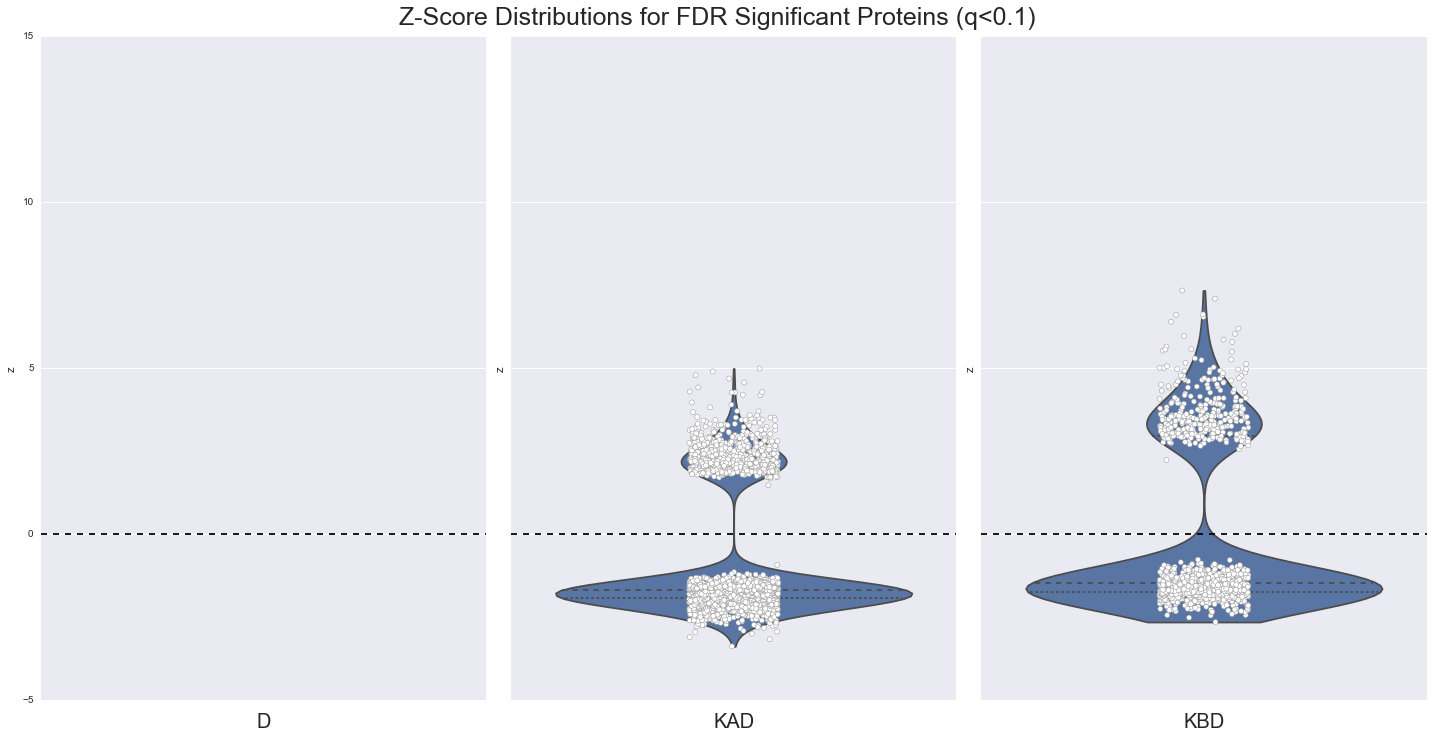

In [179]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['q']<0.1,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['q']<0.1,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for FDR Significant Proteins (q<0.1)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

In [180]:
# Identify the FDR-significant proteins
print "FDR-Significant Difference in Clustered-ness:"
print D.ix[D['q']<0.1,["sid","chain","z","q"]]

print "\nFDR-Significant Preference for Segregation of COSMIC from ExAC"
print KAD.ix[KAD['q']<0.1,["sid","chain","z","q"]]

print "\nFDR-Significant Segregation of ExAC from COSMIC"
print KBD.ix[KBD['q']<0.1,["sid","chain","z","q"]]

FDR-Significant Difference in Clustered-ness:
Empty DataFrame
Columns: [sid, chain, z, q]
Index: []

FDR-Significant Preference for Segregation of COSMIC from ExAC
                   sid  chain         z         q
49306  ENSP00000262304      6 -2.958099  0.024970
32291  ENSP00000401306     17  4.891898  0.024970
35655  ENSP00000257290      7  4.980755  0.024970
5951   ENSP00000369129      1 -3.389914  0.037455
33888  ENSP00000280551      1 -2.371629  0.037455
11327  ENSP00000364887      2  4.557245  0.037455
8621   ENSP00000348368      2 -3.112366  0.053506
16668  ENSP00000419530      6 -2.745172  0.058263
25588  ENSP00000245457      1 -3.175048  0.058263
41370  ENSP00000261424      3 -2.614385  0.059927
29470  ENSP00000353874      7 -2.605714  0.070503
22517  ENSP00000324020      1 -2.580578  0.070503
27251  ENSP00000400855      1  4.286183  0.070503
20180  ENSP00000355890      2  4.411928  0.070503
22398  ENSP00000420161      1 -2.942588  0.070503
20670  ENSP00000465596      1 -2.588

In [181]:
# Look for significant segregation
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']>0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']>0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*
ENSP00000075120	2
ENSP00000365550	3
ENSP00000306627	4
ENSP00000352185	1
ENSP00000303585	10
ENSP00000436262	2
ENSP00000276282	1
ENSP00000429185	1
ENSP00000269886	2
ENSP00000181839	3
ENSP00000367372	2
ENSP00000371985	4
ENSP00000376358	1
ENSP00000306497	1
ENSP00000366568	3
ENSP00000369292	10
ENSP00000422871	4
ENSP00000429848	2
ENSP00000427647	1
ENSP00000361565	1
ENSP00000257290	7
ENSP00000244519	1
ENSP00000357958	2
ENSP00000387178	1
ENSP00000386336	2
ENSP00000333329	1
ENSP00000260327	4
ENSP00000358991	3
ENSP00000269878	3
ENSP00000227520	2
ENSP00000428603	2
ENSP00000234626	1
ENSP00000286070	5
ENSP00000299178	1
ENSP00000383376	1


In [182]:
# Look for significant overlap
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']<0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']<0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*
ENSP00000337471	1
ENSP00000338213	9
ENSP00000366557	1
ENSP00000435838	6
ENSP00000259698	2
ENSP00000254801	1
ENSP00000259938	1
ENSP00000361623	6
ENSP00000287652	2
ENSP00000233099	13
ENSP00000392096	1
ENSP00000419502	2
ENSP00000334041	4
ENSP00000357565	5
ENSP00000423626	1
ENSP00000311183	1
ENSP00000324534	4
ENSP00000369339	1
ENSP00000166345	1
ENSP00000293883	2
ENSP00000341083	11
ENSP00000344272	3
ENSP00000416504	5
ENSP00000362759	5
ENSP00000415089	2
ENSP00000401371	1
ENSP00000359248	1
ENSP00000401823	3
ENSP00000258052	1
ENSP00000264167	1
ENSP00000301732	1
ENSP00000337477	1
ENSP00000258383	4
ENSP00000375686	1
ENSP00000274026	2
ENSP00000332576	5
ENSP00000344233	2
ENSP00000314992	4
ENSP00000296350	4
ENSP00000234827	2
ENSP00000353402	7
ENSP00000367075	4
ENSP00000348359	12
ENSP00000412292	3
ENSP00000450539	1
ENSP00000378270	1
ENSP00000360817	4
ENSP00000247970	2
ENSP00000409465	2
ENSP00000351039	2
ENSP00000358956	2
ENSP00000264211	1
ENSP00

AttributeError: 'NoneType' object has no attribute 'set_title'

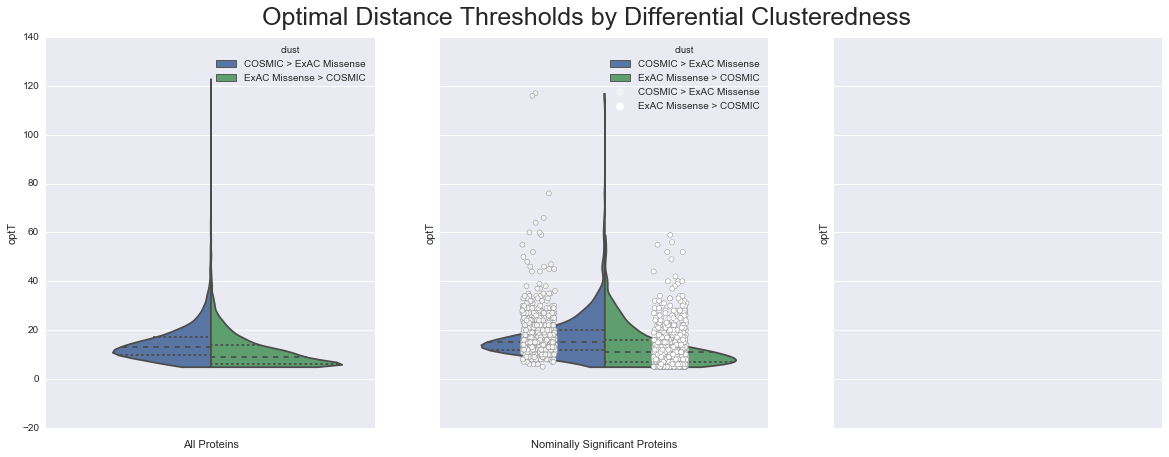

In [183]:
fig,ax = plt.subplots(1,3,figsize=(20,7),sharey=True)
df = D.copy()
ho = ['COSMIC > ExAC Missense','ExAC Missense > COSMIC']
df.ix[df['z']>0.,'clust'] = 'COSMIC > ExAC Missense'
df.ix[df['clust'].isnull(),'clust'] = 'ExAC Missense > COSMIC'
df[''] = ''
plt.suptitle("Optimal Distance Thresholds by Differential Clusteredness",fontsize=25,y=.96)
sns.violinplot(x='',y='optT',hue='clust',data=df,split=True,cut=0,ax=ax[0],inner='quart',hue_order=ho)
ax[0].set_xlabel("All Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,cut=0,ax=ax[1],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[1])
ax[1].set_xlabel("Nominally Significant Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['q']<0.1],cut=0,ax=ax[2],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['q']<0.1],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[2])
ax[2].set_xlabel("FDR-Significant Proteins")
plt.ylim([0,35])
plt.show()

In [ ]:
# Identifying the frequency of counts conditioned on univariate results
# THESE ARE INDEPENDENT COLUMNS LOADED TOGETHER FOR CONVENIENCE. TREAT AS INDEPENDENT VECTORS
df = pd.read_csv("COSMIC-ExAC_SpatialSegregationTable.txt",sep='\t',header=0)
print df.describe()

In [ ]:
# Segregation table counts (COSMIC x ExAC)
print "Spatial Segregation of COSMIC and ExAC Conditioned on Univariate Patterns"
print "ROW 1"
# SigClust by SigClust
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiSeg"].dropna().values))
# NonSig by SigClust
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiSeg"].dropna().values))
# SigDisp by SigClust
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiSeg"].dropna().values))

print "\nROW 2"
# SigClust by NonSig
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiSeg"].dropna().values))
# NonSig by NonSig
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiSeg"].dropna().values))
# SigDisp by NonSig
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiSeg"].dropna().values))

print "\nROW 3"
# SigClust by NonSig
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiSeg"].dropna().values))
# NonSig by NonSig
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiSeg"].dropna().values))
# SigDisp by NonSig
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiSeg"].dropna().values))

In [ ]:
# COSMIC clustering > ExAC table counts (COSMIC x ExAC)
print "COSMIC Clustering > ExAC Clustering Conditioned on Univariate Patterns"
print "ROW 1"
# SigClust by SigClust
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiClust"].dropna().values))
# NonSig by SigClust
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiClust"].dropna().values))
# SigDisp by SigClust
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiClust"].dropna().values))

print "\nROW 2"
# SigClust by NonSig
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiClust"].dropna().values))
# NonSig by NonSig
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiClust"].dropna().values))
# SigDisp by NonSig
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiClust"].dropna().values))

print "\nROW 3"
# SigClust by NonSig
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiClust"].dropna().values))
# NonSig by NonSig
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiClust"].dropna().values))
# SigDisp by NonSig
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiClust"].dropna().values))

In [ ]:
# COSMIC  > ExAC table counts (COSMIC x ExAC)
print "COSMIC Spatially Correlated with ExAC Conditioned on Univariate Patterns"
print "ROW 1"
# SigClust by SigClust
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiCorr"].dropna().values))
# NonSig by SigClust
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiCorr"].dropna().values))
# SigDisp by SigClust
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACClust"].dropna().values).intersection(df["MultiCorr"].dropna().values))

print "\nROW 2"
# SigClust by NonSig
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiCorr"].dropna().values))
# NonSig by NonSig
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiCorr"].dropna().values))
# SigDisp by NonSig
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACNonSig"].dropna().values).intersection(df["MultiCorr"].dropna().values))

print "\nROW 3"
# SigClust by NonSig
print len(set(df["COSMICClust"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiCorr"].dropna().values))
# NonSig by NonSig
print len(set(df["COSMICNonSig"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiCorr"].dropna().values))
# SigDisp by NonSig
print len(set(df["COSMICDisp"].dropna().values).intersection(df["ExACDisp"].dropna().values).intersection(df["MultiCorr"].dropna().values))